In [1]:
!pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

/tmp/ipython-input-3-795677733.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.63234 | test_accuracy: 0.67696 |  0:00:00s
epoch 1  | loss: 0.5275  | test_accuracy: 0.74743 |  0:00:00s
epoch 2  | loss: 0.48934 | test_accuracy: 0.76802 |  0:00:01s
epoch 3  | loss: 0.47242 | test_accuracy: 0.78916 |  0:00:01s
epoch 4  | loss: 0.46441 | test_accuracy: 0.78428 |  0:00:02s
epoch 5  | loss: 0.452   | test_accuracy: 0.78266 |  0:00:02s
epoch 6  | loss: 0.44423 | test_accuracy: 0.7935  |  0:00:03s
epoch 7  | loss: 0.43797 | test_accuracy: 0.79404 |  0:00:04s
epoch 8  | loss: 0.43031 | test_accuracy: 0.79621 |  0:00:04s
epoch 9  | loss: 0.43643 | test_accuracy: 0.79241 |  0:00:05s
epoch 10 | loss: 0.43361 | test_accuracy: 0.79566 |  0:00:06s
epoch 11 | loss: 0.42992 | test_accuracy: 0.79241 |  0:00:06s
epoch 12 | loss: 0.43282 | test_accuracy: 0.79566 |  0:00:07s
epoch 13 | loss: 0.42482 | test_accuracy: 0.80759 |  0:00:07s
epoch 14 | loss: 0.42372 | test_accuracy: 0.79295 |  0:00:08s
epoch 15 | loss: 0.42316 | test_accuracy: 0.80217 |  0:00:08s
epoch 16

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.8579945799457994
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       922
           1       0.85      0.88      0.86       923

    accuracy                           0.86      1845
   macro avg       0.86      0.86      0.86      1845
weighted avg       0.86      0.86      0.86      1845



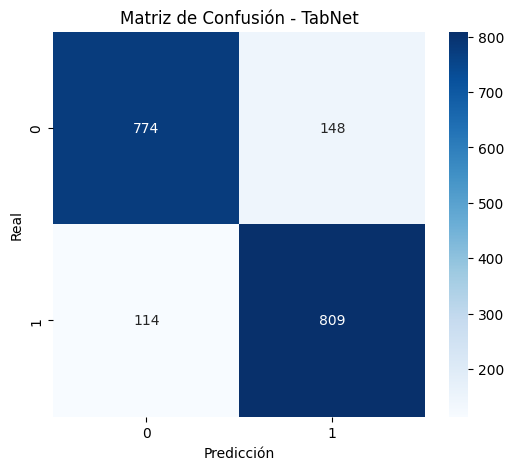

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import seaborn as sns
import matplotlib.pyplot as plt

#Cargar dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data = data.drop(columns=['id'])

#Rellenar valores faltantes
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

#Codificación de variables categoricas
label_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

#Separar variables
X = data.drop(columns='hypertension')
y = data['hypertension']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

X_res_np = X_resampled_scaled.astype(np.float32)
y_res_np = y_resampled.values.astype(np.int64)
X_test_np = X_test_scaled.astype(np.float32)
y_test_np = y_test.values.astype(np.int64)


#TabNetClassifier
tabnet = TabNetClassifier(
    device_name='cuda' if torch.cuda.is_available() else 'cpu',
    verbose=1
)

#Entrenamiento
tabnet.fit(
    X_res_np, y_res_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_name=['test'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024
)

#Predicción
y_pred = tabnet.predict(X_test_np)
print("Accuracy:", accuracy_score(y_test_np, y_pred))
print("Classification Report:\n", classification_report(y_test_np, y_pred))

#Matriz de confusión
cm = confusion_matrix(y_test_np, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TabNet')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


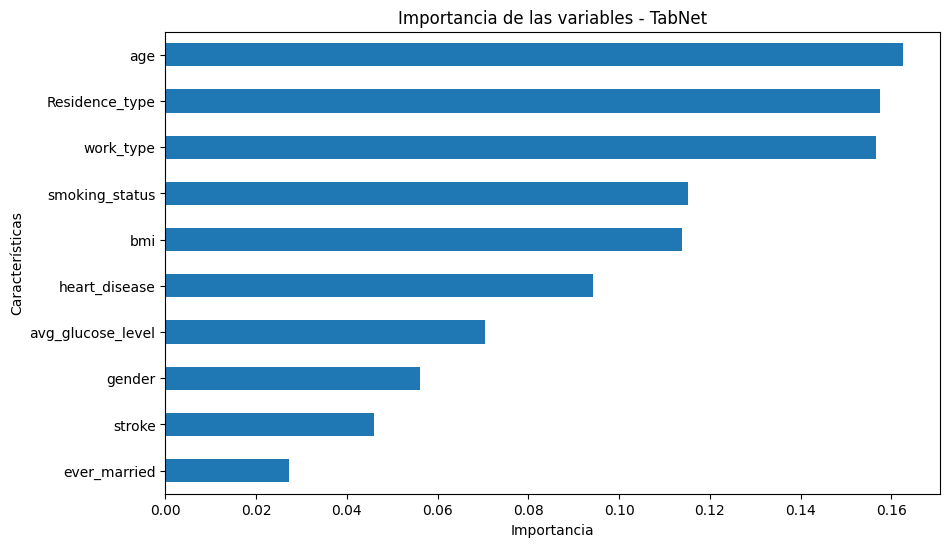

In [4]:
import pandas as pd

importancias = tabnet.feature_importances_
df_importancia = pd.Series(importancias, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
df_importancia.plot(kind='barh')
plt.title('Importancia de las variables - TabNet')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.gca().invert_yaxis()
plt.show()